# 📘 Mongolian University Entrance Examination Results Analysis & Dashboard

## 🧾 Project Overview

This project analyzes student performance data from the Mongolian University Entrance Examinations across multiple subjects and provinces. The goal is to consolidate subject-specific exam datasets and build a comprehensive dashboard to uncover key insights on student outcomes, regional trends, percentile thresholds, and subject participation.

The analysis follows a standard data science workflow:

In [2]:
#Import neccesary libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Data Cleaning and Preprocessing

In [3]:
#Folder path
folder_path = "Dataset"

# Define mappings
region_map = {
    1: "Arkhangai Province", 2: "Bayan-Ölgii Province", 3: "Bayankhongor Province",
    4: "Bulgan Province", 5: "Govi-Altai Province", 6: "Govisümber Province",
    7: "Darkhan-Uul Province", 8: "Dornogovi Province", 9: "Dornod Province",
    10: "Dundgovi Province", 11: "Zavkhan Province", 12: "Orkhon Province",
    13: "Övörkhangai Province", 14: "Ömnögovi Province", 15: "Sükhbaatar Province",
    16: "Selenge Province", 17: "Töv Province", 18: "Uvs Province", 19: "Khovd Province",
    20: "Khentii Province", 21: "Khövsgöl Province", 22: "Baganuur District", 23: "Ulaanbaatar City"
}

iso_map = {
    "Arkhangai Province": "MN-073", "Bayan-Ölgii Province": "MN-071", "Bayankhongor Province": "MN-069",
    "Bulgan Province": "MN-067", "Govi-Altai Province": "MN-065", "Govisümber Province": "MN-064",
    "Darkhan-Uul Province": "MN-037", "Dornogovi Province": "MN-063", "Dornod Province": "MN-061",
    "Dundgovi Province": "MN-059", "Zavkhan Province": "MN-057", "Orkhon Province": "MN-035",
    "Övörkhangai Province": "MN-055", "Ömnögovi Province": "MN-053", "Sükhbaatar Province": "MN-051",
    "Selenge Province": "MN-049", "Töv Province": "MN-047", "Uvs Province": "MN-046",
    "Khovd Province": "MN-043", "Khentii Province": "MN-039", "Khövsgöl Province": "MN-041",
    "Baganuur District": "MN-020", "Ulaanbaatar City": "MN-1"
}

# Initialize list to collect dataframes
all_data = []

# Folder containing datasets
folder_path = "Dataset"

# Loop through CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        subject = filename.replace(".csv", "").capitalize()
        
        # Load and process
        df = pd.read_csv(file_path)
        df["Subject"] = subject
        df["Region"] = df["Areacode"].map(region_map)
        df["ISO_Code"] = df["Region"].map(iso_map)
        
        all_data.append(df)

# Combine all into one dataset
combined_df = pd.concat(all_data, ignore_index=True)

# Drop unnecessary columns
combined_df = combined_df.drop("Placement", axis=1)

# Save combined dataset
output_path = "Combined Dataset.csv"
combined_df.to_csv(output_path, index=False)

output_path


'Combined Dataset.csv'

In [ ]:
import pandas as pd

# Load your combined dataset
df = pd.read_csv("Combined Dataset.csv")

# Define the target percentiles
percentiles = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25]

# Prepare an empty list to hold results
results = []

# Group by Subject and compute percentiles
for subject, group in df.groupby("Subject"):
    for p in percentiles:
        results.append({
            "Subject": subject,
            "Percentile": f"{int(p * 100)}%",
            "Firstscore": round(group["Firstscore"].quantile(p), 2),
            "Convertedscore": round(group["Convertedscore"].quantile(p), 2)
        })

# Create a DataFrame
percentile_df = pd.DataFrame(results)

# Save the result to CSV or Excel
percentile_df.to_csv("Subject Percentile.csv", index=False)
# Or: percentile_df.to_excel("Subject_Percentile_Scores.xlsx", index=False)


In [5]:
# Load the dataset
df = pd.read_csv("Combined Dataset.csv")

## Exploratory Data Analysis

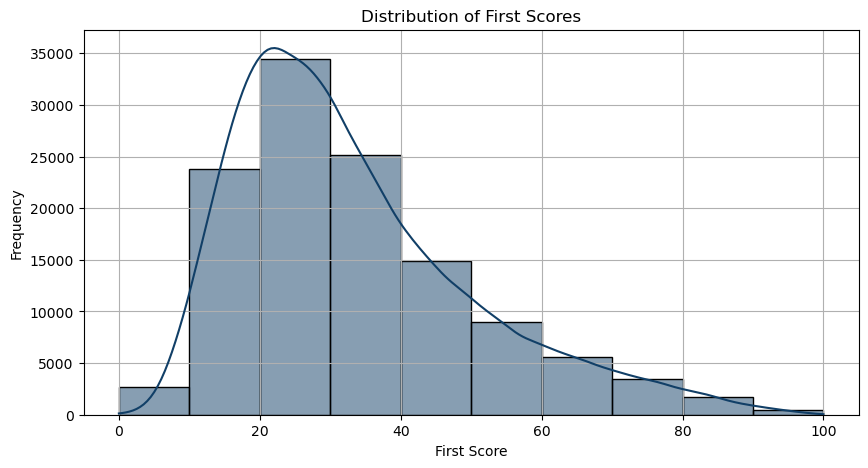

In [6]:
#First Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Firstscore"], bins=10, kde=True, color="#113f67", linewidth=1)
plt.title("Distribution of First Scores")
plt.xlabel("First Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


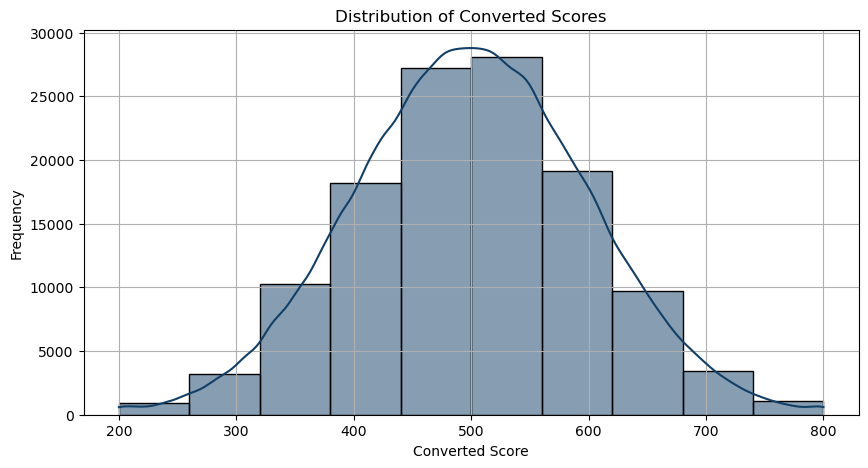

In [7]:
# Converted Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Convertedscore"], bins=10, kde=True, color="#113f67")
plt.title("Distribution of Converted Scores")
plt.xlabel("Converted Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


/var/folders/zb/cc1txqfj67jbtr91_h72hwt00000gn/T/ipykernel_7966/1075225939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Region", data=df, order=df["Region"].value_counts().index, palette="Blues_r")


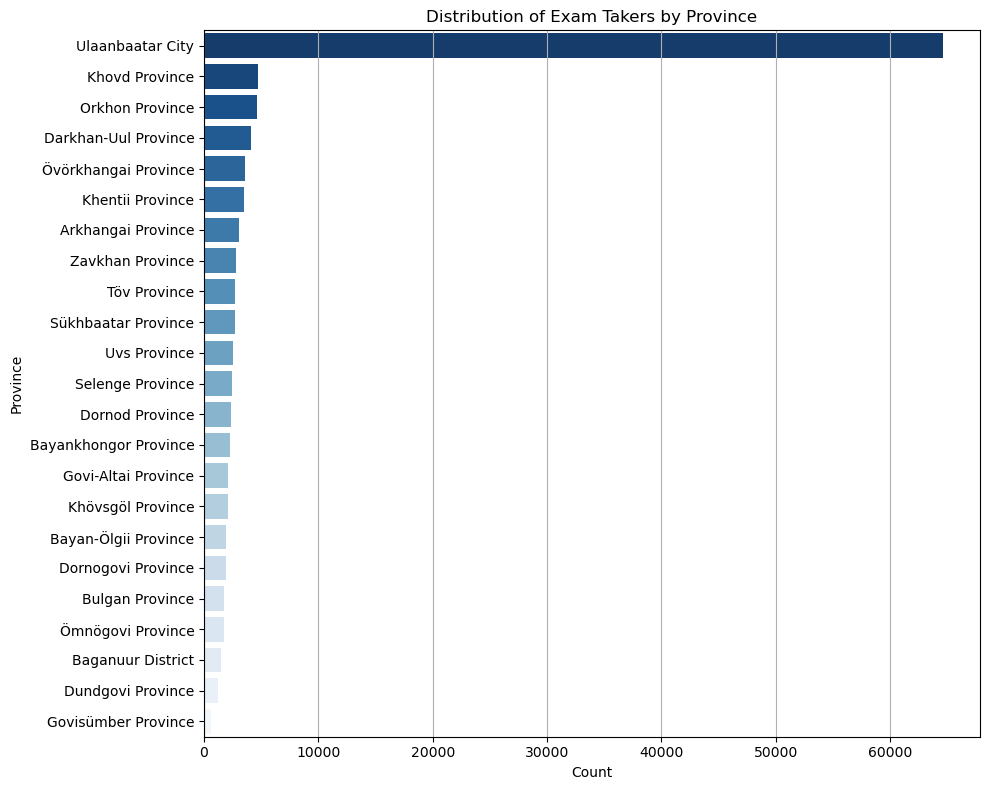

In [8]:
# Bar Chart of Exam Takers by Province
plt.figure(figsize=(10, 8))
sns.countplot(y="Region", data=df, order=df["Region"].value_counts().index, palette="Blues_r")
plt.title("Distribution of Exam Takers by Province")
plt.xlabel("Count")
plt.ylabel("Province")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


/var/folders/zb/cc1txqfj67jbtr91_h72hwt00000gn/T/ipykernel_7966/2340908687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Subject", data=df, order=df["Subject"].value_counts().index, palette="Blues_r")


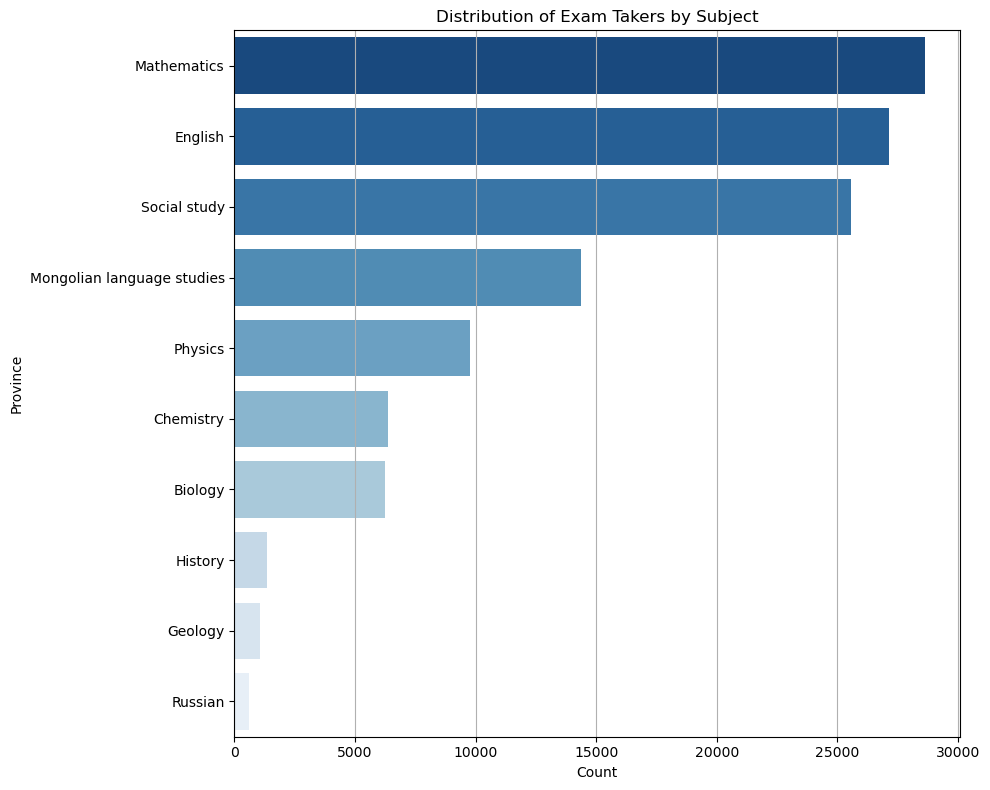

In [9]:
# Bar Chart of Exam Takers by Subject
plt.figure(figsize=(10, 8))
sns.countplot(y="Subject", data=df, order=df["Subject"].value_counts().index, palette="Blues_r")
plt.title("Distribution of Exam Takers by Subject")
plt.xlabel("Count")
plt.ylabel("Province")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


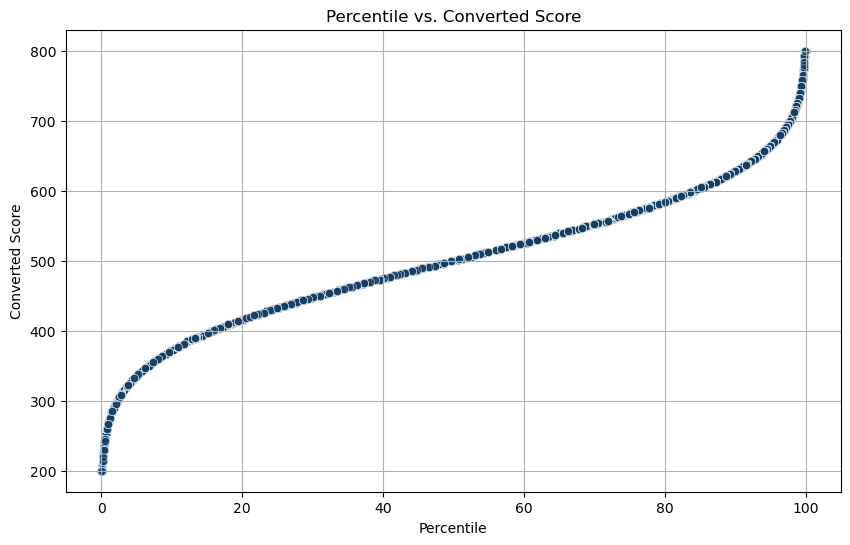

In [10]:
#Percentile vs. Converted Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Percentile", y="Convertedscore", color="#113f67", alpha=0.6)
plt.title("Percentile vs. Converted Score")
plt.xlabel("Percentile")
plt.ylabel("Converted Score")
plt.grid(True)
plt.show()


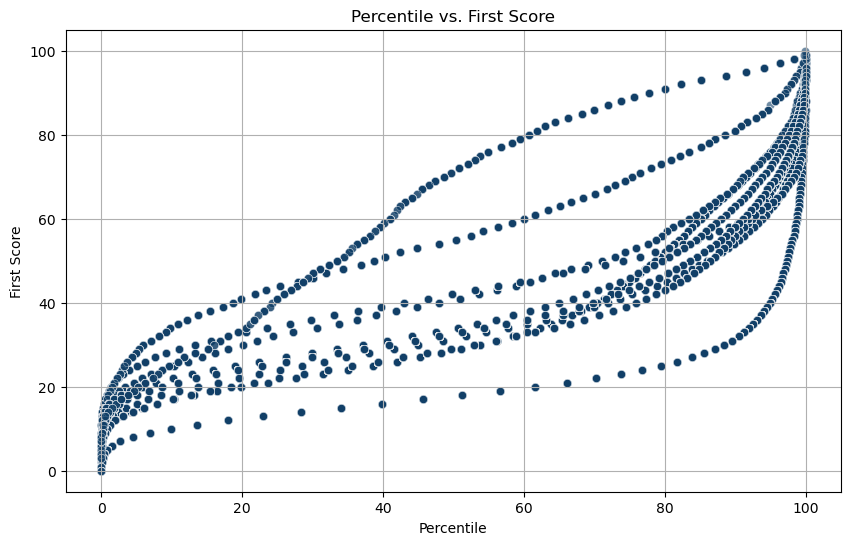

In [11]:
#Percentile vs. Converted Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Percentile", y="Firstscore", color="#113f67", alpha=0.6)
plt.title("Percentile vs. First Score")
plt.xlabel("Percentile")
plt.ylabel("First Score")
plt.grid(True)
plt.show()


/var/folders/zb/cc1txqfj67jbtr91_h72hwt00000gn/T/ipykernel_7966/4057214996.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


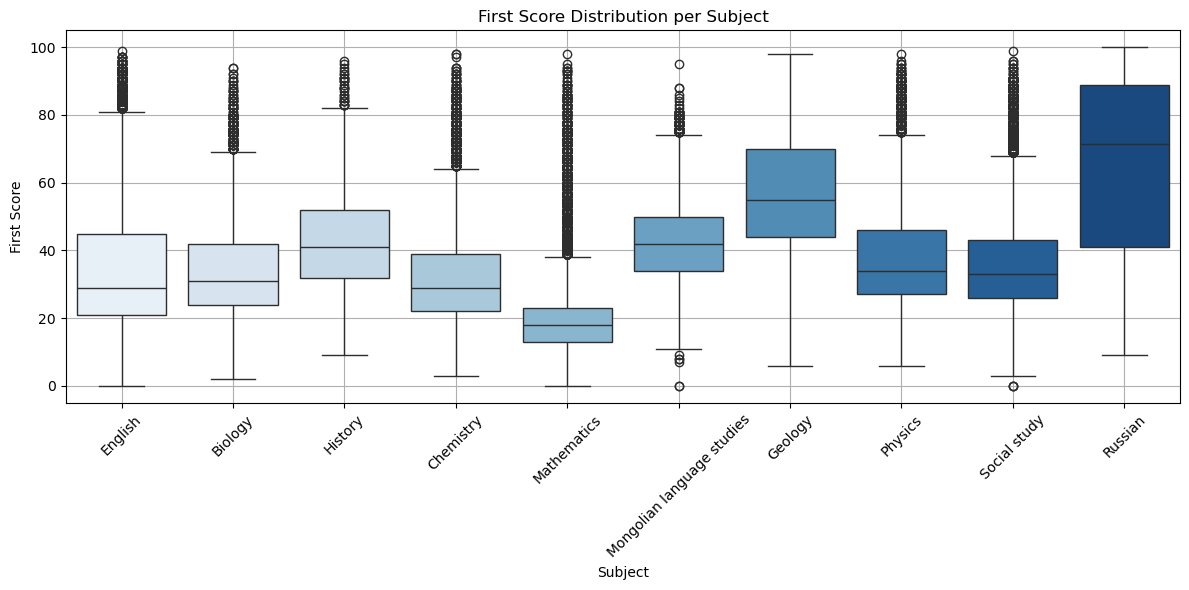

In [12]:
# Box Plot of First Scores per Subject
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="Subject",
    y="Firstscore",
    palette="Blues"
)
plt.title("First Score Distribution per Subject")
plt.xlabel("Subject")
plt.ylabel("First Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


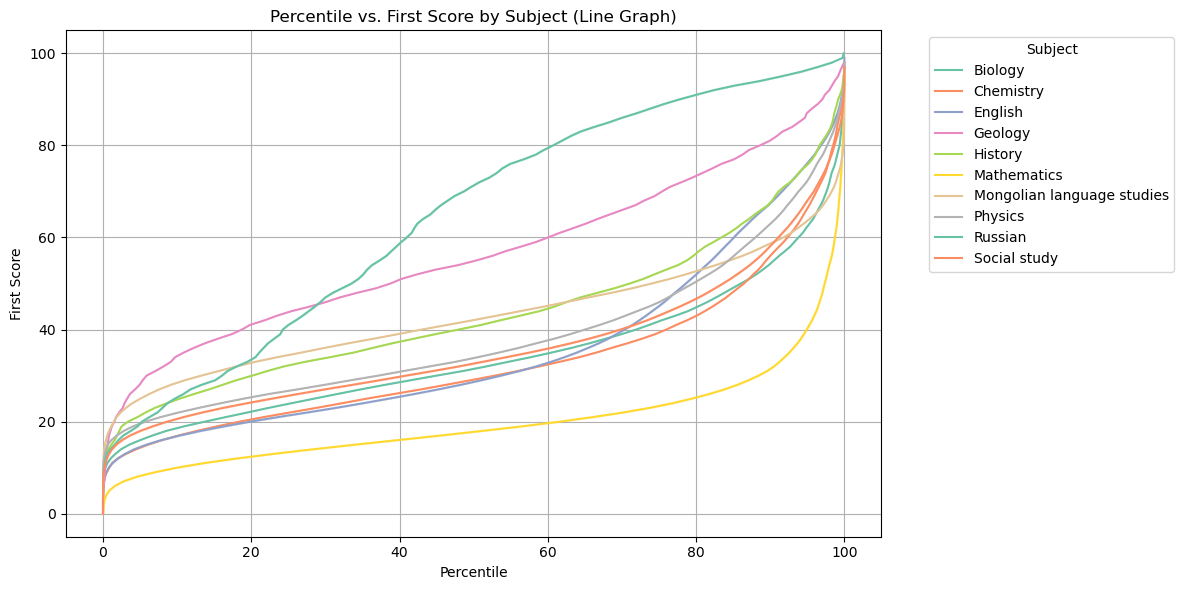

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by Percentile to ensure proper line flow
df_sorted = df.sort_values(by=["Subject", "Percentile"])

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_sorted,
    x="Percentile",
    y="Firstscore",
    hue="Subject",
    palette="Set2"
)
plt.title("Percentile vs. First Score by Subject (Line Graph)")
plt.xlabel("Percentile")
plt.ylabel("First Score")
plt.grid(True)
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


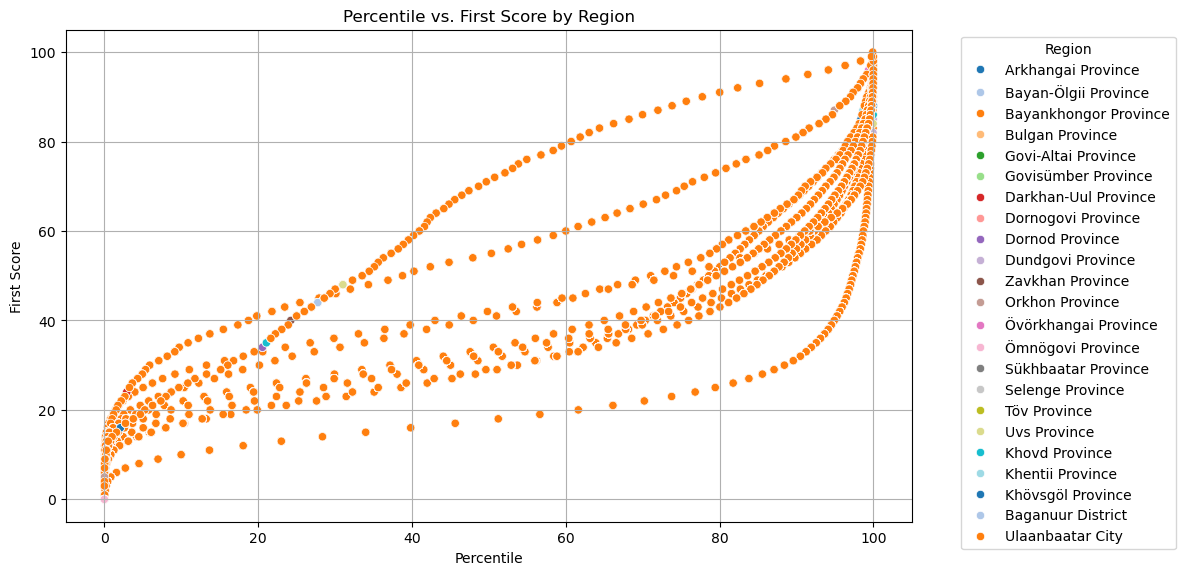

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="Percentile",
    y="Firstscore",
    hue="Region",              # Color by Region now
    palette="tab20",           # Good for many regions (adjust as needed)
)
plt.title("Percentile vs. First Score by Region")
plt.xlabel("Percentile")
plt.ylabel("First Score")
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Modeling

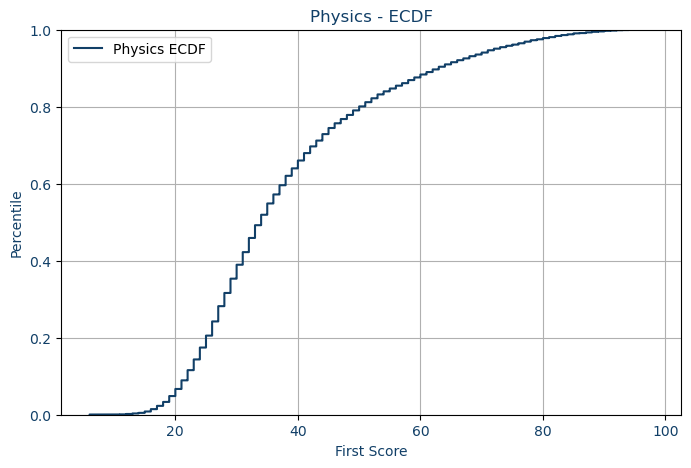

In [15]:
subject = "Physics"
scores = df[df["Subject"] == subject]["Firstscore"].dropna()

plt.figure(figsize=(8, 5))
sns.ecdfplot(data=scores, color="#113f67", label=f"{subject} ECDF")

# Styling
plt.title(f"{subject} - ECDF", color="#113f67")
plt.xlabel("First Score", color="#113f67")
plt.ylabel("Percentile", color="#113f67")
plt.xticks(color="#113f67")
plt.yticks(color="#113f67")
plt.grid(True)
plt.legend()

plt.show()


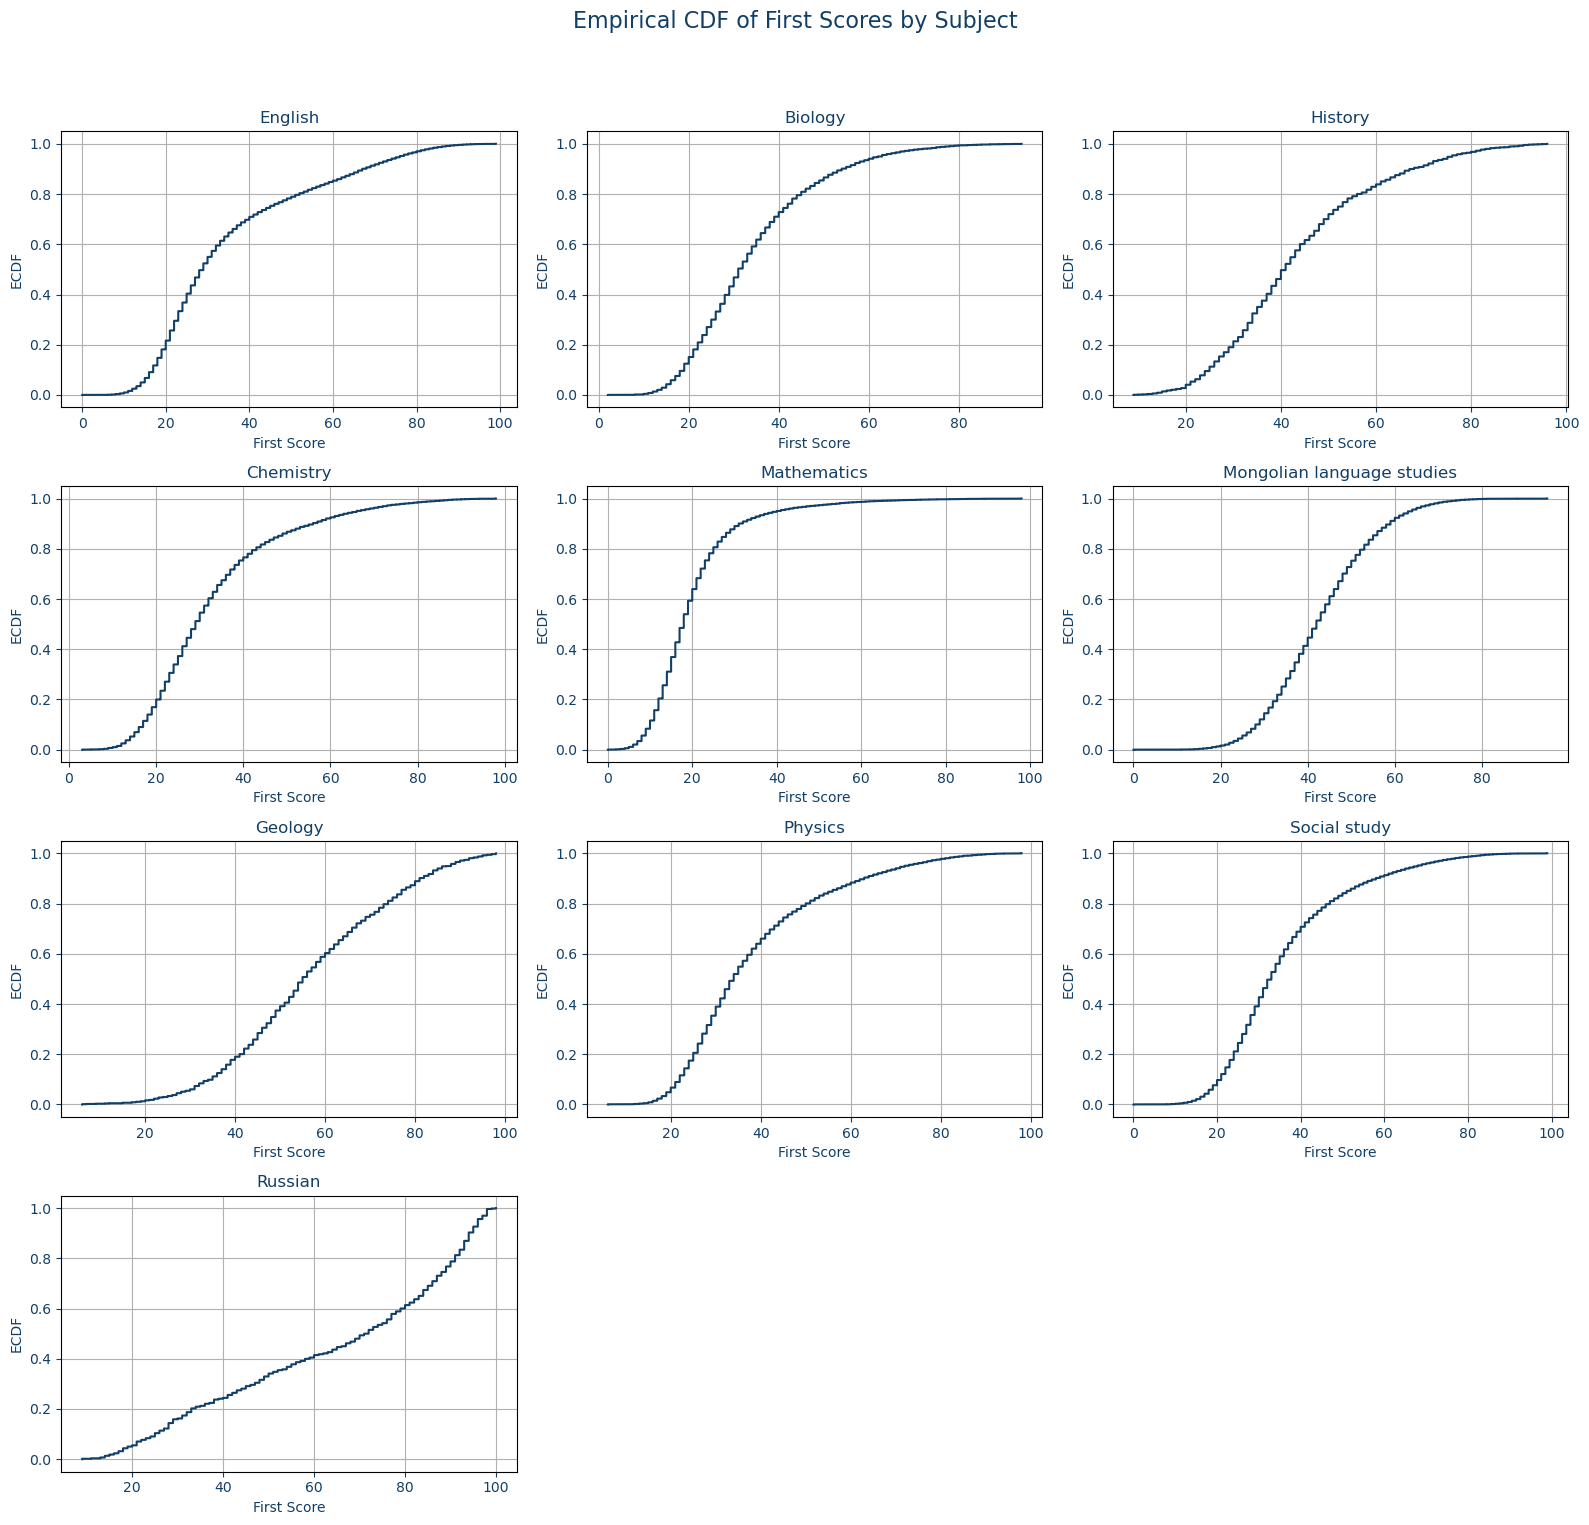

In [16]:
subjects = df['Subject'].dropna().unique()
n_cols = 3
n_rows = -(-len(subjects) // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]

    # Filter scores for this subject
    subject_scores = df[df['Subject'] == subject]['Firstscore'].dropna()

    # Compute ECDF
    ecdf = ECDF(subject_scores)

    # Plot ECDF step graph
    ax.step(ecdf.x, ecdf.y, where='post', color="#113f67")

    # Style
    ax.set_title(subject, fontsize=12, color="#113f67")
    ax.set_xlabel("First Score", color="#113f67")
    ax.set_ylabel("ECDF", color="#113f67")
    ax.tick_params(axis='x', colors="#113f67")
    ax.tick_params(axis='y', colors="#113f67")
    ax.grid(True)

# Hide unused axes
for j in range(len(subjects), len(axes)):
    fig.delaxes(axes[j])

# Supertitle
plt.suptitle("Empirical CDF of First Scores by Subject", fontsize=16, color="#113f67")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


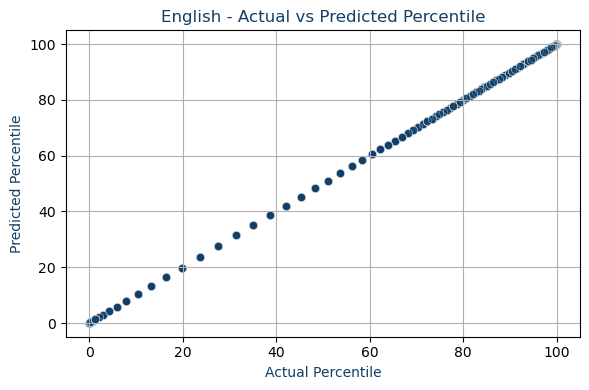

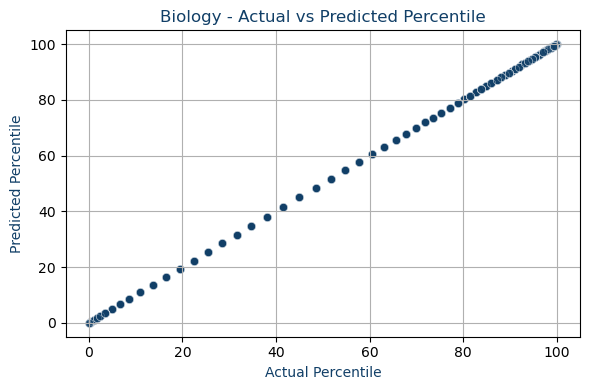

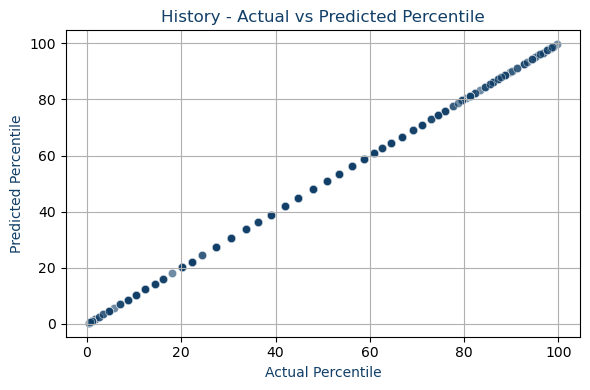

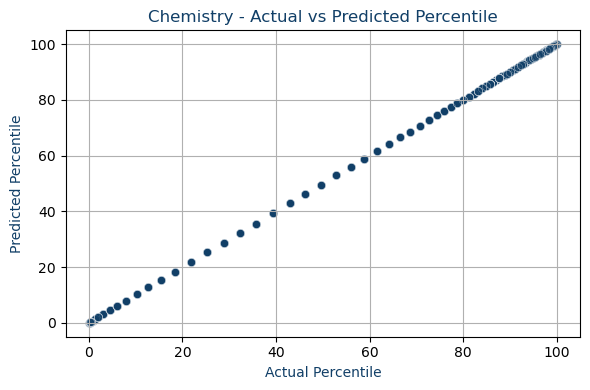

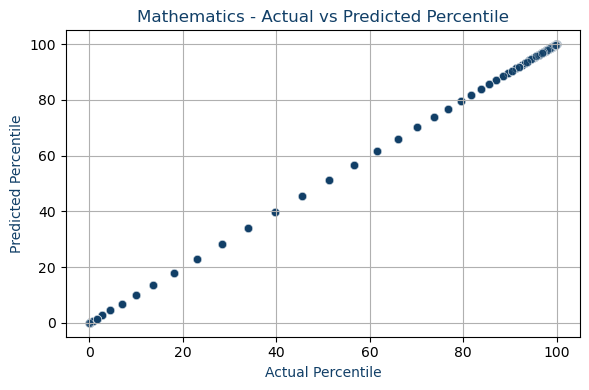

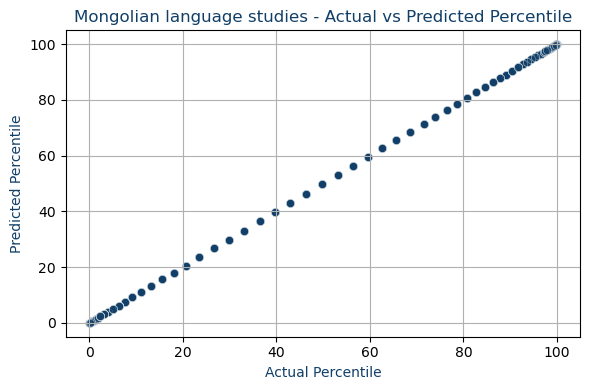

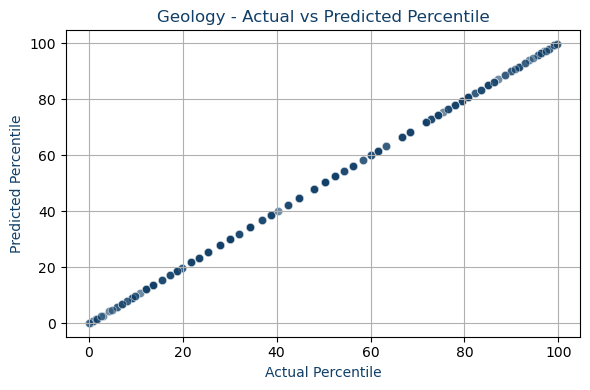

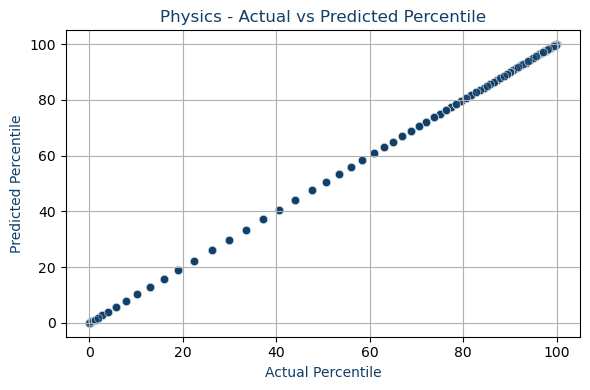

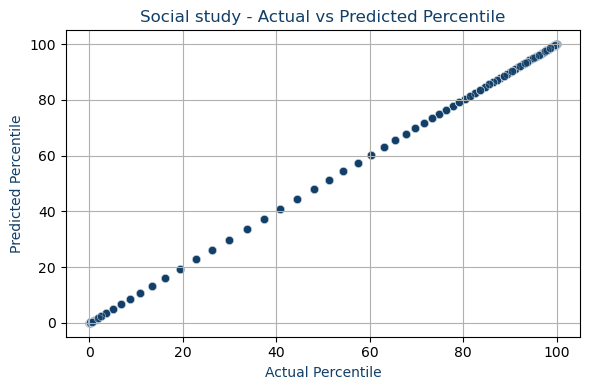

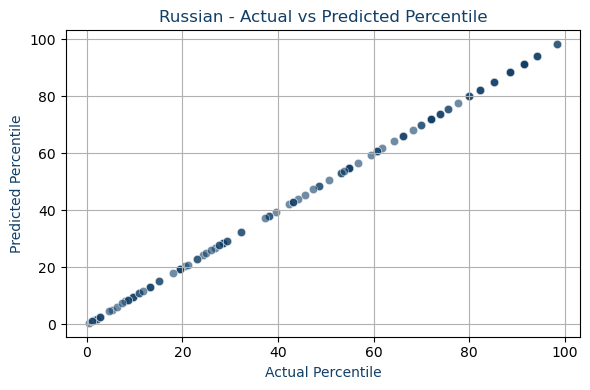

Model Evaluation Per Subject
                      Subject  R2 Score     MAE
0                     English       1.0  0.0001
1                     Biology       1.0  0.0002
2                     History       1.0  0.0017
3                   Chemistry       1.0  0.0001
4                 Mathematics       1.0  0.0001
5  Mongolian language studies       1.0  0.0001
6                     Geology       1.0  0.0054
7                     Physics       1.0  0.0001
8                Social study       1.0  0.0002
9                     Russian       1.0  0.0224


In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("Combined Dataset.csv")

# Drop NaNs
df = df[["Subject", "Convertedscore", "Percentile"]].dropna()

# Prepare to store results
results = []

# Loop through each subject
for subject in df["Subject"].unique():
    subject_df = df[df["Subject"] == subject]

    X = subject_df[["Convertedscore"]]
    y = subject_df["Percentile"]

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Subject": subject,
        "R2 Score": round(r2, 3),
        "MAE": round(mae, 4)
    })

    # Optional: Visualize predictions
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="#113f67")
    plt.title(f"{subject} - Actual vs Predicted Percentile", color="#113f67")
    plt.xlabel("Actual Percentile", color="#113f67")
    plt.ylabel("Predicted Percentile", color="#113f67")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display performance summary
results_df = pd.DataFrame(results)
print("Model Evaluation Per Subject")
print(results_df)


## Visualize